In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
class JerkMinimizingTrajectory:
    
    def __init__(self, x0, v0, a0, x1, v1, a1, t):
        
        self.c0 = x0
        self.c1 = v0
        self.c2 = .5*a0
        
        r1 = x1 - self.c0 - self.c1 - self.c2
        r2 = v1 - self.c1 - 2*self.c2
        r3 = a1 - 2*self.c2
        
        self.c3 = 10*r1-4*r2+.5*r3
        self.c4 = -15*r1+7*r2-1*r3
        self.c5 = 6*r1-3*r2+.5*r3

        self.c1 /= t
        self.c2 /= t*t
        self.c3 /= t*t*t
        self.c4 /= t*t*t*t
        self.c5 /= t*t*t*t*t
    
    def s(self, t):
        return self.c0 + t * (self.c1 + t*(self.c2 + t*(self.c3 + t*(self.c4 + t * self.c5))))
    
    def v(self, t):
        return self.c1 + t*(2*self.c2 + t*(3*self.c3 + t*(4*self.c4 + t * 5*self.c5)))

    def a(self, t):
        return 2*self.c2 + t*(2*3*self.c3 + t*(3*4*self.c4 + t * 4*5*self.c5))

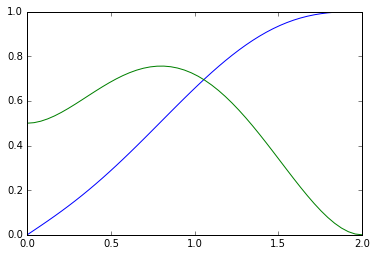

In [47]:
jmt = JerkMinimizingTrajectory(0,1,0,1,0,0, 2)


ls = linspace(0,2)
plot(ls, jmt.s(ls))
plot(ls, jmt.v(ls))